In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

## Data

In [2]:
x_ = np.random.rand(100)*10
y_ = 2 * x_ + 10 + np.random.randn(100)*0.5

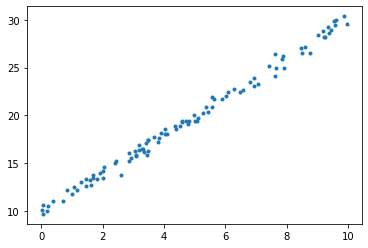

In [3]:
plt.plot(x_, y_, '.')
plt.show()

## Linear Regression Model

$$ H(x) = Wx + b $$

In [4]:
def LinearRegression(X):
    return W * X + b

## Cost Function

$$ cost(W, b) = \frac{1}{m} \sum^m_{i=1} \left( H(x^{(i)}) - y^{(i)} \right)^2 $$

In [5]:
def MSEloss(y_pred, y):
    return torch.mean((y_pred-y)**2)

## Gradient Descent

$$ \nabla W = \frac{\partial cost}{\partial W} = \frac{2}{m} \sum^m_{i=1} \left( Wx^{(i)} - y^{(i)} \right)x^{(i)} $$

$$ W := W - \alpha \nabla W $$

In [6]:
def gradient_descent(params, lr=0.01):
    with torch.no_grad(): # do not calculate gradient in this block
        for param in params:
            param -= lr * param.grad.data
            param.grad.data.zero_()

## Training

In [7]:
X = torch.Tensor(x_)
y = torch.Tensor(y_)

W = torch.zeros(1, requires_grad=True) # needs autograd for backpropation
b = torch.zeros(1, requires_grad=True)

optimizer = torch.optim.SGD([W, b], lr=0.01) # updating algorithm

epochs = 1000
for i in range(epochs):
    
    y_pred = LinearRegression(X)
    loss = MSEloss(y_pred, y)
    loss.backward()
    gradient_descent([W, b])
    
    if (i+1) % 100 == 0:
        print(f'epoch {i+1}: loss = {loss:.3f}  W = {W.item():.3f}  b = {b.item():.3f}')

epoch 100: loss = 8.588  W = 2.890  b = 4.347
epoch 200: loss = 3.189  W = 2.532  b = 6.608
epoch 300: loss = 1.272  W = 2.319  b = 7.956
epoch 400: loss = 0.591  W = 2.192  b = 8.758
epoch 500: loss = 0.350  W = 2.117  b = 9.237
epoch 600: loss = 0.264  W = 2.072  b = 9.522
epoch 700: loss = 0.233  W = 2.045  b = 9.691
epoch 800: loss = 0.223  W = 2.029  b = 9.793
epoch 900: loss = 0.219  W = 2.019  b = 9.853
epoch 1000: loss = 0.217  W = 2.014  b = 9.889


## Using Pytorch modules

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim

In [9]:
class LinearRegression(nn.Module):

    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

In [10]:
X = torch.Tensor(x_).unsqueeze(1)
y = torch.Tensor(y_).unsqueeze(1)

model = LinearRegression()
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

epochs = 1000
for i in range(epochs):
    
    y_pred = model(X)
    loss = loss_fn(y_pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (i+1) % 100 == 0:
        W, b = list(model.parameters())
        print(f'epoch {i+1}: loss = {loss:.3f}  W = {W.item():.3f}  b = {b.item():.3f}')

epoch 100: loss = 7.467  W = 2.829  b = 4.735
epoch 200: loss = 2.791  W = 2.496  b = 6.839
epoch 300: loss = 1.130  W = 2.297  b = 8.093
epoch 400: loss = 0.541  W = 2.179  b = 8.840
epoch 500: loss = 0.332  W = 2.109  b = 9.286
epoch 600: loss = 0.258  W = 2.067  b = 9.551
epoch 700: loss = 0.231  W = 2.042  b = 9.709
epoch 800: loss = 0.222  W = 2.027  b = 9.803
epoch 900: loss = 0.218  W = 2.018  b = 9.859
epoch 1000: loss = 0.217  W = 2.013  b = 9.893


## Multivariate Linear Regression

$$ H(X) = XW + b $$

In [32]:
x_ = np.random.rand(100, 5) * 10
y_ = x_ @ np.array([0.1, 0.2, 0.3, 0.4, 0.5]) + 10 + np.random.randn(100)*0.5

In [33]:
class MultivariateLinearRegression(nn.Module):

    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(5, 1) # input dimension 만 바뀜

    def forward(self, x):
        return self.linear(x)

In [38]:
X = torch.Tensor(x_)
y = torch.Tensor(y_).unsqueeze(1)

model = MultivariateLinearRegression()
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.004)

epochs = 10000
for i in range(epochs):

    y_pred = model(X)
    loss = loss_fn(y_pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (i+1) % 1000 == 0:
        W, b = list(model.parameters())
        print(f'epoch {i+1}: loss = {loss:.3f}  W = {W.detach().numpy()[0]}  b = {b.item():.3f}')

epoch 1000: loss = 2.567  W = [0.34842396 0.37391397 0.48941836 0.61965036 0.76563925]  b = 4.014
epoch 2000: loss = 1.043  W = [0.25187078 0.30679157 0.41900432 0.5211035  0.66027004]  b = 6.447
epoch 3000: loss = 0.501  W = [0.19432724 0.26678813 0.37703907 0.46237174 0.59747225]  b = 7.897
epoch 4000: loss = 0.309  W = [0.16003287 0.24294719 0.35202906 0.42736924 0.5600465 ]  b = 8.761
epoch 5000: loss = 0.241  W = [0.13959418 0.2287385  0.33712357 0.4065085  0.53774154]  b = 9.276
epoch 6000: loss = 0.217  W = [0.1274133  0.2202705  0.3282403  0.3940761  0.52444845]  b = 9.583
epoch 7000: loss = 0.208  W = [0.12015361 0.21522367 0.32294595 0.38666654 0.51652586]  b = 9.766
epoch 8000: loss = 0.205  W = [0.1158271  0.21221597 0.31979078 0.38225067 0.5118044 ]  b = 9.875
epoch 9000: loss = 0.204  W = [0.11324874 0.21042353 0.31791046 0.3796191  0.5089906 ]  b = 9.940
epoch 10000: loss = 0.203  W = [0.11171208 0.20935528 0.31678984 0.37805068 0.5073136 ]  b = 9.979
